# This is an example of how to use lmt-analysis code in Jupyter

We show here a basic example of plotting trajectory. We also try to get here the benefit of using the Jupyter cell-style

## Performs the imports:
The only diffence with the original python code is the import that needs the following lines to work:
```python
import sys
sys.path.insert(1, "../")
```
This is the only difference with the orginal python code that you will find in the others examples.

In [1]:
'''
Created on 18 dec. 2018

@author: Fab
'''

import sys
sys.path.insert(1, "../")

import sqlite3
from lmtanalysis.FileUtil import getFilesToProcess

from lmtanalysis.Animal import AnimalPool
from lmtanalysis.Measure import oneHour

## Ask file to process to the user with a dialog window:

In [2]:
#ask the user for database to process
print( "Select file name in window")
files = getFilesToProcess()

Select file name in window


In [3]:
## Process all files

Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:A RFID:000004612582 Genotype:None User1:None
Animal Id:2 Name:B RFID:000004612467 Genotype:None User1:None
Animal Id:1 Name:A RFID:000004612582 Genotype:None User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=108000
Animal Id:1 Name:A RFID:000004612582 Genotype:None User1:None   106503  detections loaded in 1.4440021514892578 seconds.
Animal Id:2 Name:B RFID:000004612467 Genotype:None User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=2 AND FRAMENUMBER>=0 AND FRAMENUMBER<=108000
Animal Id:2 Name:B RFID:000004612467 Genoty

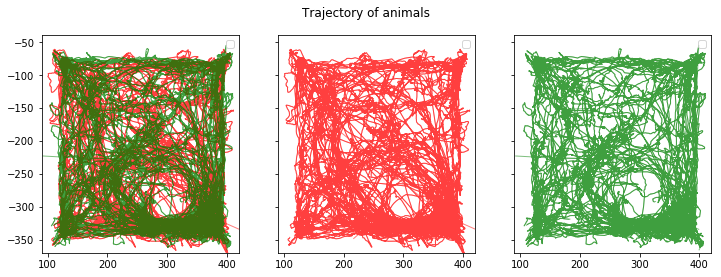

In [4]:
for file in files:

    # connect to database
    connection = sqlite3.connect( file )

    # create an animalPool, which basically contains your animals
    animalPool = AnimalPool()

    # load infos about the animals
    animalPool.loadAnimals( connection )

    # load all detection (positions) of all animals for the first hour
    animalPool.loadDetection( start = 0, end = oneHour )

    # plot and show trajectory
    animalPool.plotTrajectory()
        